# HW 3 - Mikey Sison
We will classify the Fashion MNIST images (https://github.com/zalandoresearch/fashion-mnist).
Within in that page, there are links for the gzipped train and test files.

1. Write fetch_fashionmnist_data(). You'll need to use urllib and unzip the data. 
2. Use mnist_reader() function from that webpage to load data. **Plot the first 100 images with 10 images per row similar to what we did with MNIST**.

We will use the first 1000 examples as training and the next 1000 examples for testing to save time.  
3. Use SVC(gamma="auto"...) and report the 3-fold cross-validation scores. Also report test scores (Accuracy) for training and test data


4. Use SVC(gamma="auto"...) and perform 3-fold cross-validation **prediction**, and plot the confusion matrix as an image. 

Don't forget to add comments!



## 1. Fetching and opening the data

*   Write fetch_fashionmnist_data(). 
*   You'll need to use urllib and unzip the data. 
---






In [3]:
## to access the google drive with the google account
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
# Importing all the necessary packages
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np

import os
import tarfile
import urllib.request

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [5]:
# URLs for Training sets
TRAIN_IMG_URL = 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz'
TRAIN_LABELS_URL = 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz'

# URLs for Test sets
TEST_IMG_URL = 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz'
TEST_LABELS_URL = 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz'

DOWNLOAD_DIR = "/content/drive/MyDrive/MachineLearning/HW/HW3/data"

# Paths in drive
TRAIN_IMG_PATH = os.path.join(DOWNLOAD_DIR, 'train-images-idx3-ubyte.gz')
TRAIN_LABELS_PATH = os.path.join(DOWNLOAD_DIR, 'train-labels-idx3-ubyte.gz')

TEST_IMG_PATH = os.path.join(DOWNLOAD_DIR, 't10k-images-idx1-ubyte.gz')
TEST_LABELS_PATH = os.path.join(DOWNLOAD_DIR, 't10k-labels-idx1-ubyte.gz')


In [6]:
# Fetching training data from AWS and downloading them
urllib.request.urlretrieve(TRAIN_IMG_URL, TRAIN_IMG_PATH)
urllib.request.urlretrieve(TRAIN_LABELS_URL, TRAIN_LABELS_PATH)

urllib.request.urlretrieve(TEST_IMG_URL, TEST_IMG_PATH)
urllib.request.urlretrieve(TEST_LABELS_URL, TEST_LABELS_PATH)

('/content/drive/MyDrive/MachineLearning/HW/HW3/data/t10k-labels-idx1-ubyte.gz',
 <http.client.HTTPMessage at 0x7fc1abef2150>)

## 2. Data Visualization
* Use mnist_reader() function from that webpage to load data. 
**Plot the first 100 images with 10 images per row similar to what we did with MNIST*.
---



### Loading the mnist Data

In [7]:
# Unziping the gz files using the given function
def load_mnist(path, kind='train'):
    import gzip

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels


In [8]:
# Instantiate the mnist Train and Test data
TRAIN_IMAGES, TRAIN_LABELS = load_mnist(DOWNLOAD_DIR, 'train')
TEST_IMAGES, TEST_LABELS = load_mnist(DOWNLOAD_DIR, 't10k')

### Plotting the mnist Data

In [9]:
# Plotting data function from slides
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")
    
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

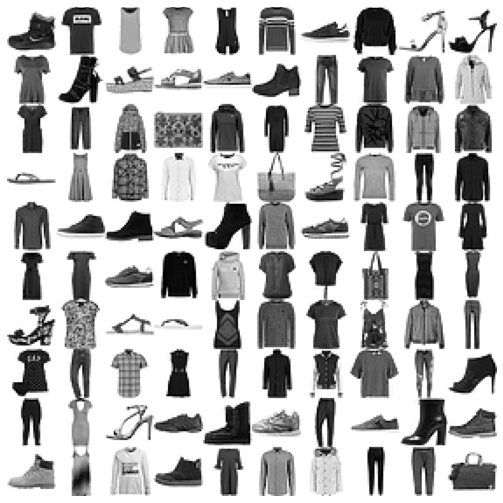

In [10]:
plt.figure(figsize=(9,9))
example_images = TRAIN_IMAGES[:100]
plot_digits(example_images, images_per_row=10)
#save_fig("more_digits_plot")
plt.show()

## 3. SVC and 3-fold validation on training data




---



### Slicing the data

In [11]:
# The first 1000 will make up the training set and the second 1000 will be the test set.

train1000_X = TRAIN_IMAGES[:1000]       #Images
train1000_Y = TRAIN_LABELS[:1000]       #Labels

test1000_X = TRAIN_IMAGES[1000:2000]    #Images
test1000_Y = TRAIN_LABELS[1000:2000]    #Labels

### SVC Instantiaition 

In [32]:
from sklearn.svm import SVC 

svm_clf = SVC(gamma = 'auto', kernel = 'linear', random_state= 42)
svm_clf.fit(train1000_X, train1000_Y)


SVC(gamma='auto', kernel='linear', random_state=42)

### 3-Fold Cross Validation

In [36]:
from sklearn.model_selection import cross_val_score

print('Avg Accucracy for Training set: ', np.average(cross_val_score(svm_clf, train1000_X, train1000_Y, cv=3, scoring="accuracy")))
print('Avg Accucracy for Test set: ', np.average(cross_val_score(svm_clf, test1000_X, test1000_Y, cv=3, scoring="accuracy")))

Avg Accucracy for Training set:  0.7990055924187661
Avg Accucracy for Test set:  0.7830225435015855


## 4. Cross Validation Prediction and Confusion Matrix


In [52]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(svm_clf, train1000_X, train1000_Y, cv=3)
conf_mx = confusion_matrix(train1000_Y, y_train_pred)

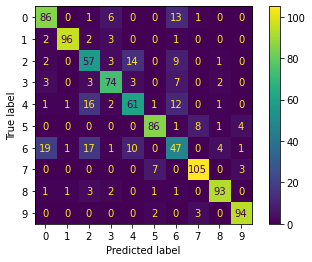

In [51]:
# Plotting Confusion matrix
sklearn.metrics.ConfusionMatrixDisplay(conf_mx).plot()